In [1]:
pip install scikit-learn pandas numpy matplotlib seaborn


     ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
      --------------------------------------- 0.2/8.9 MB 3.5 MB/s eta 0:00:03
     - -------------------------------------- 0.2/8.9 MB 2.9 MB/s eta 0:00:03
     - -------------------------------------- 0.3/8.9 MB 2.4 MB/s eta 0:00:04
     - -------------------------------------- 0.4/8.9 MB 1.9 MB/s eta 0:00:05
     - -------------------------------------- 0.4/8.9 MB 1.8 MB/s eta 0:00:05
     -- ------------------------------------- 0.5/8.9 MB 1.7 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/8.9 MB 1.6 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/8.9 MB 1.5 MB/s eta 0:00:06
     --- ------------------------------------ 0.7/8.9 MB 1.5 MB/s eta 0:00:06
     --- ------------------------------------ 0.7/8.9 MB 1.5 MB/s eta 0:00:06
     --- ------------------------------------ 0.8/8.9 MB 1.5 MB/s eta 0:00:06
     --- ------------------------------------ 0.9/8.9 MB 1.5 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Convert to DataFrame for easy viewing
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
X = df.drop('species', axis=1)  # measurements
y = df['species']              # species (0,1,2)



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [6]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0


Matplotlib is building the font cache; this may take a moment.


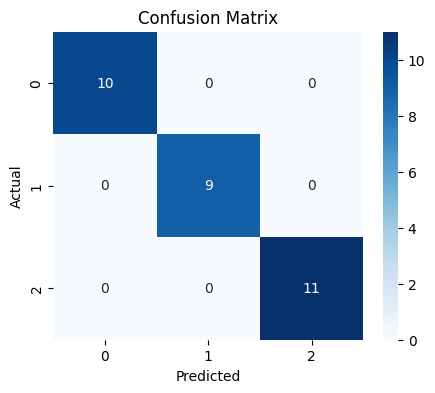

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
